<a href="https://colab.research.google.com/github/lizarani978/Python/blob/master/FIRE_OCCURANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np


In [33]:
df = pd.read_csv('data.csv', index_col=None)

In [34]:
df.head()

,Area,Oxygen,Temperature,Humidity,Fire Occurrence
0,Jharkand,40,45,20,1
1,Bangalore,50,30,10,1
2,Ecuador,10,20,70,0
3,a,60,45,70,1
4,Bangalore,30,48,10,1


In [35]:
df.isnull().sum()

Area               10
Oxygen              0
Temperature         0
Humidity            0
Fire Occurrence     0
dtype: int64

In [36]:
df = df.dropna(how='any',axis=0)


In [37]:
df.isnull().sum()

Area               0
Oxygen             0
Temperature        0
Humidity           0
Fire Occurrence    0
dtype: int64

In [38]:
df.describe()

,Oxygen,Temperature,Humidity,Fire Occurrence
count,29.000000,29.000000,29.000000,29.000000
mean,36.931034,32.896552,42.172414,0.517241
std,24.398377,15.769194,28.252774,0.508548
min,1.000000,0.000000,8.000000,0.000000
25%,20.000000,20.000000,18.000000,0.000000
50%,30.000000,35.000000,33.000000,1.000000
75%,56.000000,45.000000,70.000000,1.000000
max,89.000000,56.000000,100.000000,1.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Area             29 non-null     object
 1   Oxygen           29 non-null     int64 
 2   Temperature      29 non-null     int64 
 3   Humidity         29 non-null     int64 
 4   Fire Occurrence  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.4+ KB


In [40]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Area'] = le.fit_transform(df['Area'])
df.head(5)

,Area,Oxygen,Temperature,Humidity,Fire Occurrence
0,2,40,45,20,1
1,0,50,30,10,1
2,1,10,20,70,0
3,3,60,45,70,1
4,0,30,48,10,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfc5814ac8>,
      dtype=object)

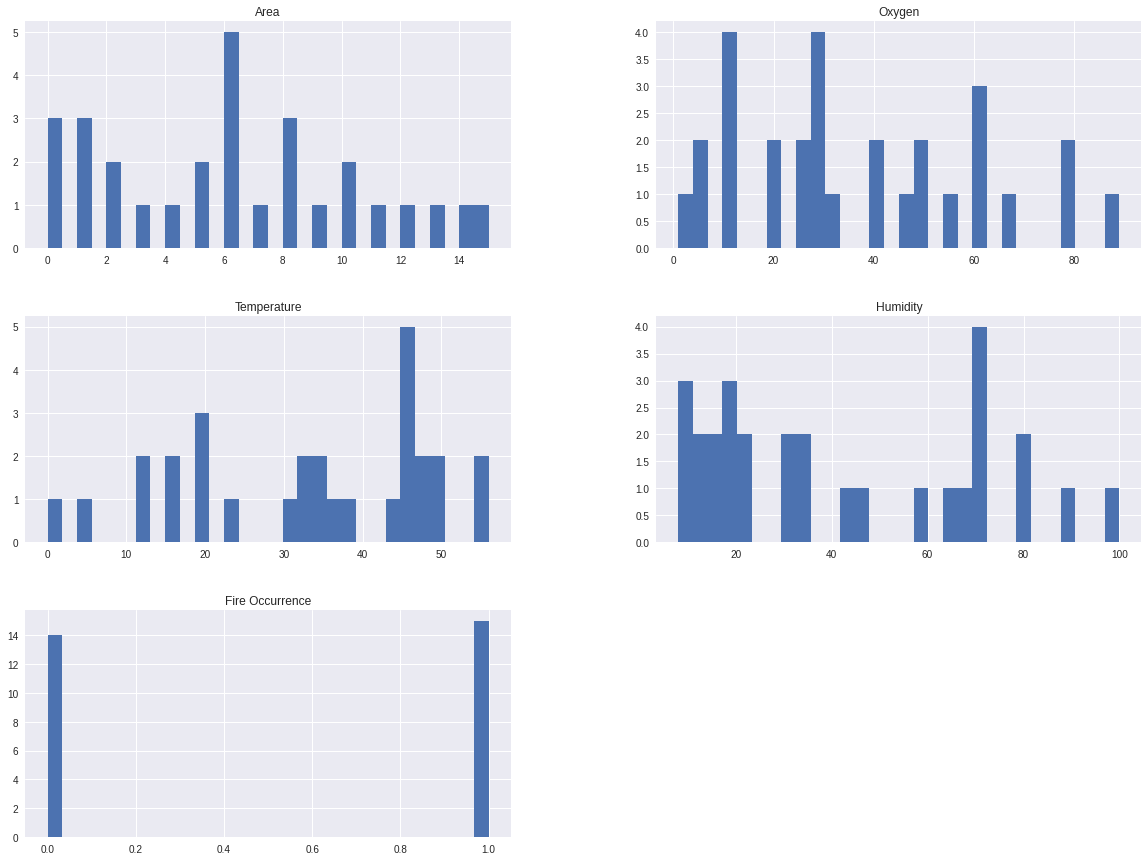

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn')
df.hist(bins=30, figsize=(20,15))

In [42]:
corr_matrix = df.corr()
corr_matrix['Area'].sort_values(ascending=False)

Area               1.000000
Humidity           0.385269
Temperature        0.308685
Oxygen             0.116311
Fire Occurrence   -0.025410
Name: Area, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfc548e470>,
      dtype=object)

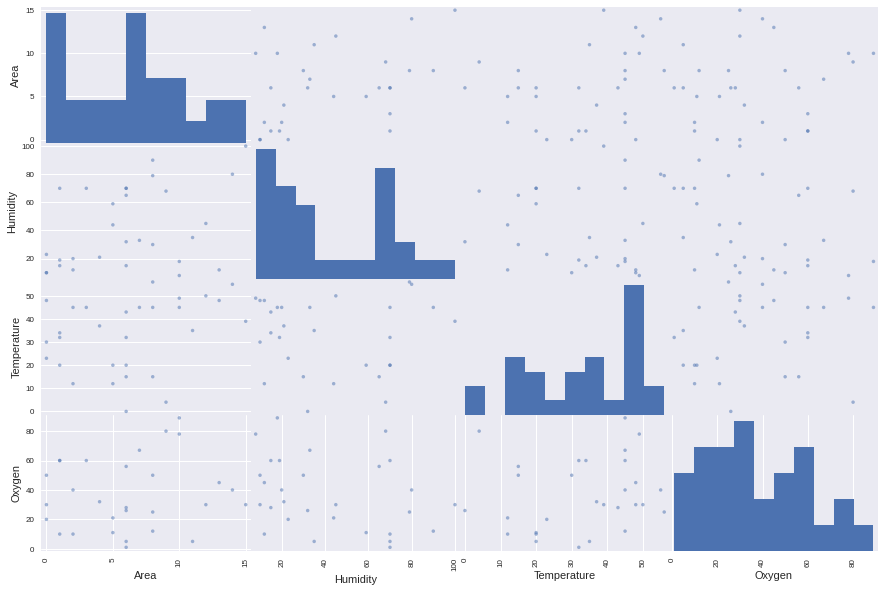

In [43]:
from pandas.plotting import scatter_matrix

attributes = ['Area', 'Humidity', 'Temperature', 'Oxygen']
scatter_matrix(df[attributes], figsize=(15,10))

In [44]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)


In [45]:
x = df.drop(['Area','Fire Occurrence'],axis=1)
y = df['Fire Occurrence']

In [46]:
from sklearn.tree import DecisionTreeClassifier             
cls = DecisionTreeClassifier()

In [47]:
cls.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
print("Accuracy :", cls.score(x,y))

Accuracy : 1.0


In [49]:
x.head()

,Oxygen,Temperature,Humidity
0,40,45,20
1,50,30,10
2,10,20,70
3,60,45,70
4,30,48,10


In [50]:
print("Fire Occurrence is",cls.predict([[80,15,20]])[0].astype(int))

Fire Occurrence is 0
